In [1]:
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import utils.utils as utils

exp = utils.Load_Experiments("../Examples/Xs.pkl")

pd.set_option('display.max_rows', None)

with open('results.pkl', 'rb') as f:
    res = pickle.load(f)
print(res[0]['param'].keys())

df = pd.DataFrame([[str(np.array(res[data]['param']['X'], dtype=int)),
                        res[data]['param']['DIGESTMOD'],
                        res[data]['param']['QUALITY'],
                        res[data]['param']['PAYLOAD_SIZE_BYTE'],
                        res[data]['param']['ATTACK_PROBABILITY'],
                        np.nanmean(res[data]['goodput']), 
                        np.nanmean(res[data]['avg_verification']), 
                        np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'], 
                        np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
                        , columns=['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY', 'goodput', 'avg_verification', 'latency', 'frame_rate'])
df.columns

dict_keys(['X', 'Y', 'KEY', 'DIGESTMOD', 'PAYLOAD_SIZE_BYTE', 'QUALITY', 'ATTACK_PROBABILITY', 'DURATION', 'OFFSET'])


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/134395303.py:23: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'],
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/134395303.py:24: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]


Index(['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY',
       'goodput', 'avg_verification', 'latency', 'frame_rate'],
      dtype='object')

In [2]:
from utils import Auth

for x in df['X'].unique():

    if x == str(np.array(np.eye(20), dtype=int)):
        df['X'].replace(x, 'Trad.', inplace=True)
    if x == str(np.array(Auth.ProMAC_X(20,4), dtype=int)):
        df['X'].replace(x, 'ProMAC 4', inplace=True)
        df.update(df[df['X'] == 'ProMAC 4']['avg_verification'].apply(lambda x: x * 1/4))
    if x == str(np.array(Auth.ProMAC_X(20,3), dtype=int)):
        df['X'].replace(x, 'ProMAC 3', inplace=True)
        df.update(df[df['X'] == 'ProMAC 3']['avg_verification'].apply(lambda x: x * 1/3))
    if x == str(np.array(Auth.ProMAC_X(20,2), dtype=int)):
        df['X'].replace(x, 'ProMAC 2', inplace=True)
        df.update(df[df['X'] == 'ProMAC 2']['avg_verification'].apply(lambda x: x * 1/2))
    if x == str(np.array(Auth.X, dtype=int)):
        df['X'].replace(x, '2DMAC', inplace=True)

for x in df['X'].unique():
    for e in exp:
        if x in str(np.array(exp[e]['results']['X'], dtype=int)):
            df['X'].replace(x, str(exp[e]['parameters']['p']) + " opmtial", inplace=True) 

# remove any rows with df['X'] value of str(np.array(np.eye(10), dtype=int)
# df = df[df['X'] != str(np.array(np.eye(10), dtype=int))]

# select only the attack probability bigger than .05

# df = df[df['ATTACK_PROBABILITY'] > .05]    


# average of avg-verification, goodput, latency, frame_rate for each X categorized by ATTACK_PROBABILITY, PAYLOAD_SIZE_BYTE, DIGESTMOD
                
# multiply the avg_verification with the DigestMOD int value
df['avg_verification'] = df['avg_verification'] * df['DIGESTMOD'].apply(lambda x: int(x[-3:]))
df = df[df['PAYLOAD_SIZE_BYTE'] <128]

goodput = df[['X', 'ATTACK_PROBABILITY', 'goodput']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
tag_bits = df[['X', 'ATTACK_PROBABILITY', 'avg_verification']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
fps = df[['X', 'ATTACK_PROBABILITY', 'frame_rate']].groupby(['ATTACK_PROBABILITY', 'X']).mean()
latency = df[['X', 'ATTACK_PROBABILITY', 'latency']].groupby(['ATTACK_PROBABILITY', 'X']).mean()


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/3494067938.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X'].replace(x, '2DMAC', inplace=True)
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/3494067938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [3]:
df = df[df['PAYLOAD_SIZE_BYTE']!=40]
df

,X,DIGESTMOD,QUALITY,PAYLOAD_SIZE_BYTE,ATTACK_PROBABILITY,goodput,avg_verification,latency,frame_rate
0,2DMAC,sha384,70,48,0.01,0.619229,733.076686,0.025828,5.125000
1,2DMAC,sha384,70,48,0.10,0.572170,484.568989,0.179658,2.857143
2,2DMAC,sha384,70,20,0.01,0.411394,734.932172,0.015301,7.800000
3,2DMAC,sha384,70,20,0.10,0.375622,484.193702,0.203176,1.833333
4,Trad.,sha384,70,20,0.10,0.274037,345.525086,0.004574,1.000000
5,Trad.,sha384,70,20,0.01,0.275648,380.201252,0.005155,7.500000
7,Trad.,sha384,70,48,0.01,0.466581,380.206884,0.005515,10.800000
8,Trad.,sha384,70,48,0.10,0.468274,345.646794,0.005488,4.888889
9,0.9 opmtial,sha384,25,20,0.00,0.270919,3840.000000,0.005086,9.629630
10,0.9 opmtial,sha512,25,20,0.00,0.220987,5120.000000,0.003583,9.481481


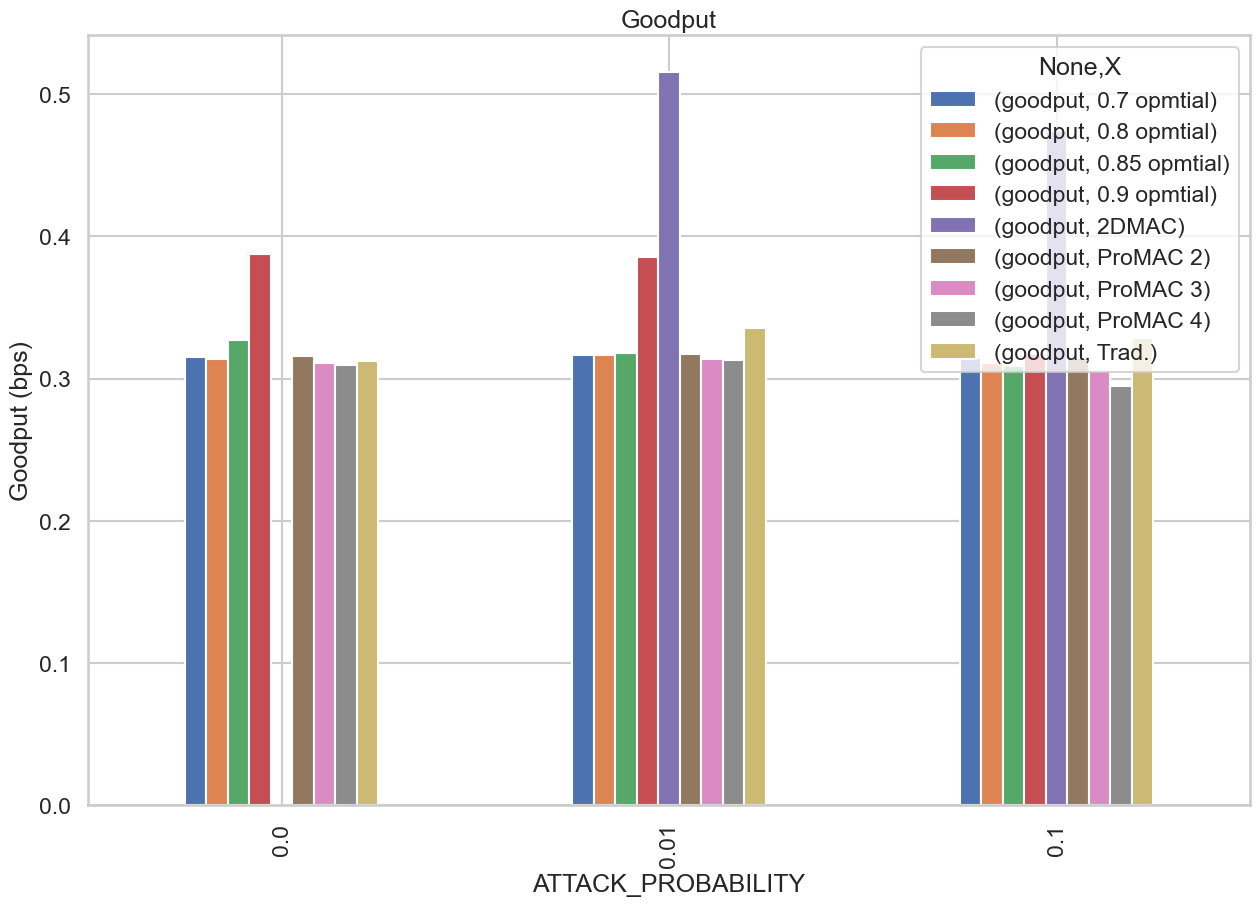

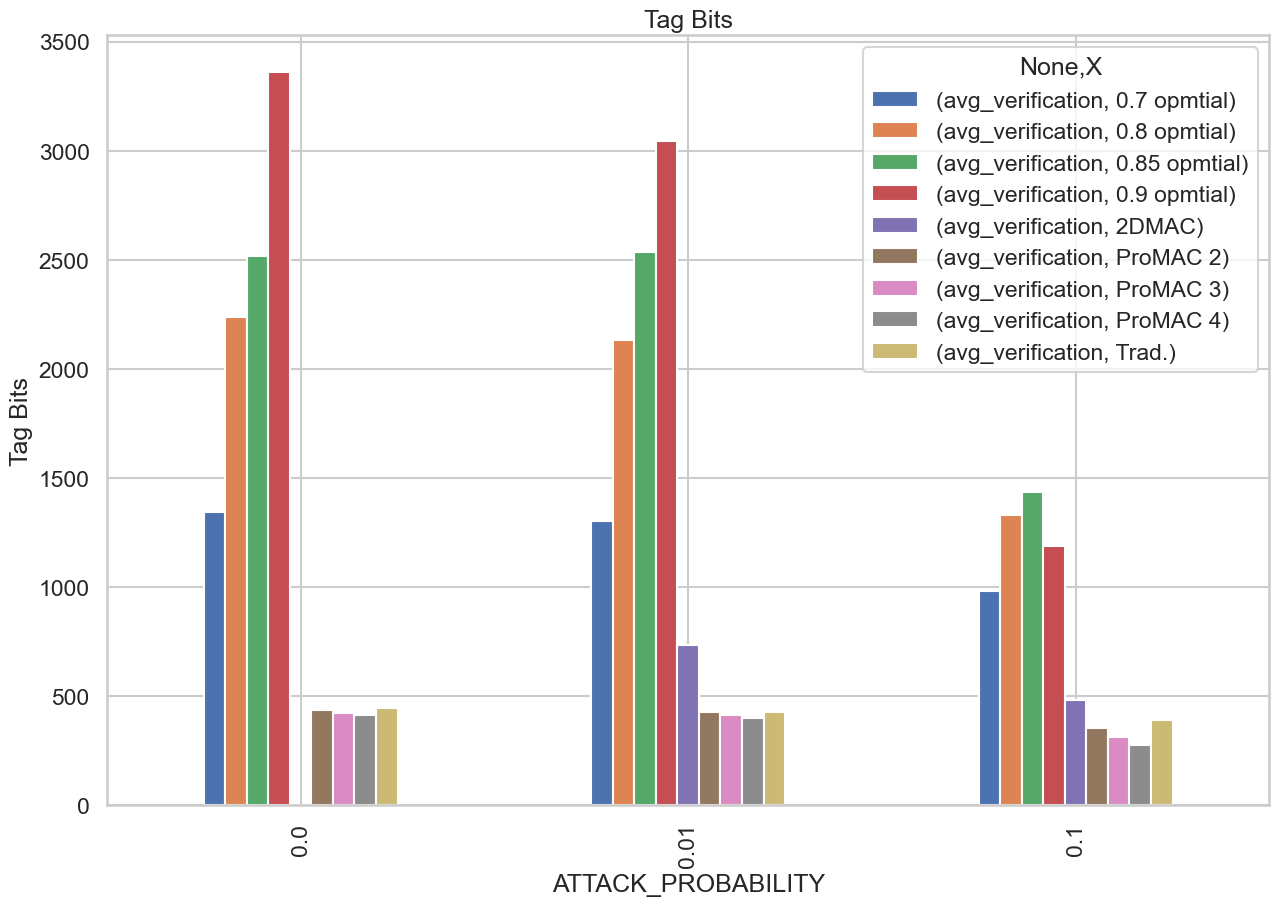

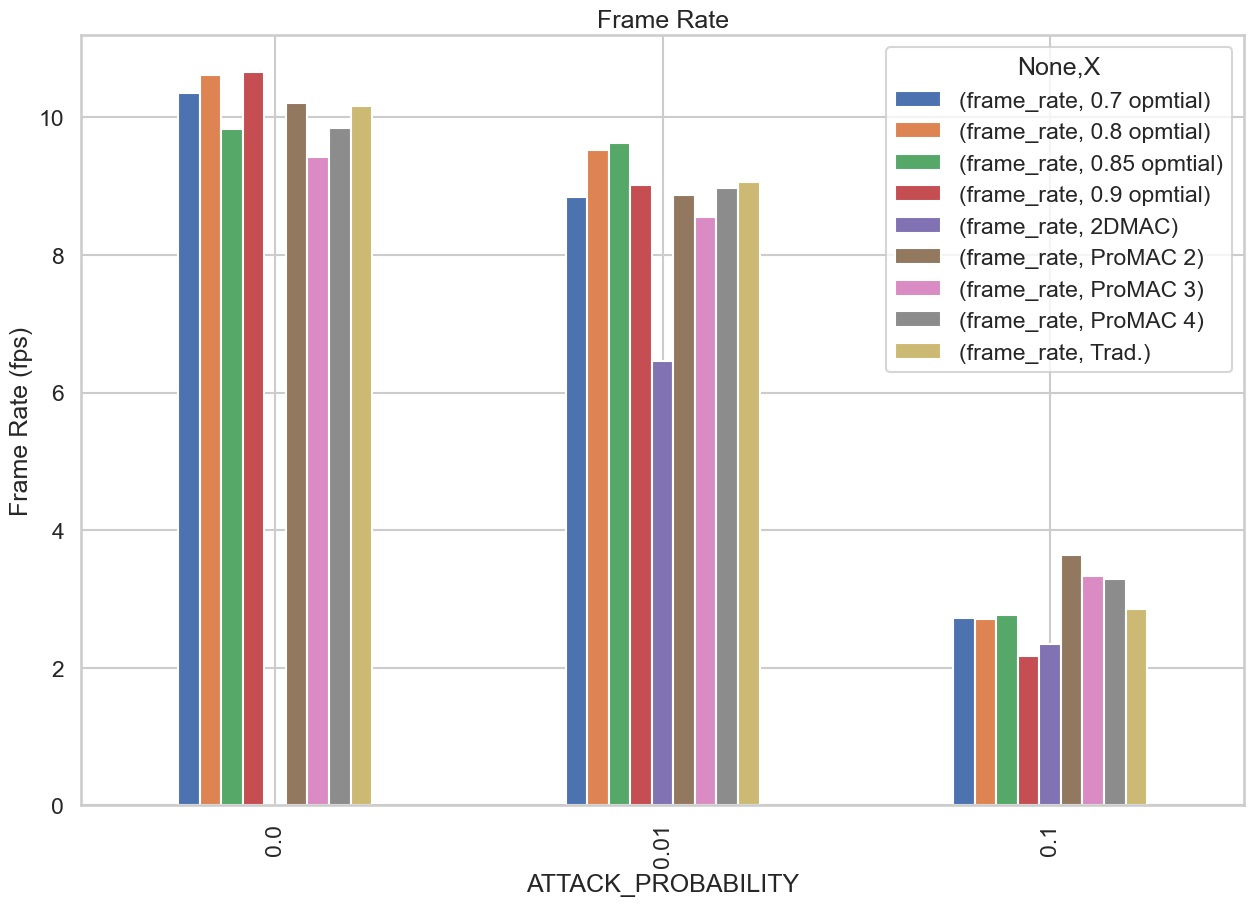

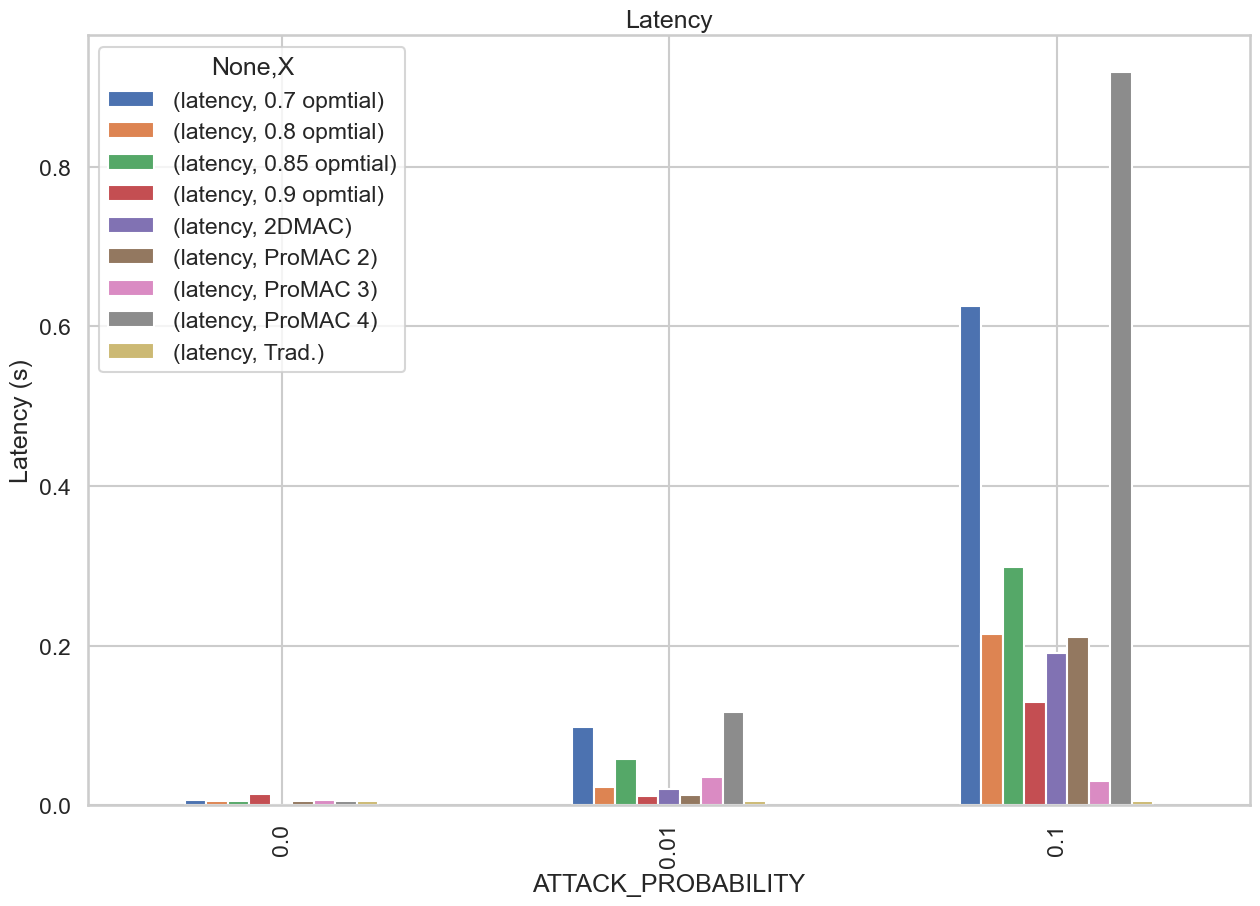

In [4]:
# create beautiful bar charts for each of the above dataframes
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('talk')

goodput.unstack().plot(kind='bar', figsize=(15, 10), title='Goodput')
# color the first 4 columns with the same color
plt.ylabel('Goodput (bps)')
plt.show()

tag_bits.unstack().plot(kind='bar', figsize=(15, 10), title='Tag Bits')
plt.ylabel('Tag Bits')
plt.show()

fps.unstack().plot(kind='bar', figsize=(15, 10), title='Frame Rate')
plt.ylabel('Frame Rate (fps)')
plt.show()

latency.unstack().plot(kind='bar', figsize=(15, 10), title='Latency')
plt.ylabel('Latency (s)')
plt.show()



In [5]:

with open('results.pkl', 'rb') as f:
    res = pickle.load(f)
print(res[0]['param'].keys())

df2 = pd.DataFrame([[np.array(res[data]['param']['X']),
                        res[data]['param']['DIGESTMOD'],
                        res[data]['param']['QUALITY'],
                        res[data]['param']['PAYLOAD_SIZE_BYTE'],
                        res[data]['param']['ATTACK_PROBABILITY'],
                        np.nanmean(res[data]['goodput']), 
                        np.nanmean(res[data]['avg_verification']), 
                        np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'], 
                        np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]
                        , columns=['X', 'DIGESTMOD', 'QUALITY', 'PAYLOAD_SIZE_BYTE', 'ATTACK_PROBABILITY', 'goodput', 'avg_verification', 'latency', 'frame_rate'])
for i in range(len(df2)):
    if "[[0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0]\n [1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0]\n [1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]\n [0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]\n [0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]\n [0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0]\n [1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0]\n [1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]\n [1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1]\n [0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0]\n [0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]\n [1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0]\n [0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]\n [0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0]\n [0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1]\n [0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1]\n [0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0]\n [0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1]\n [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0]\n [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]]" == str(np.array(df2['X'][i], dtype=int)):
        print(i)
        break



dict_keys(['X', 'Y', 'KEY', 'DIGESTMOD', 'PAYLOAD_SIZE_BYTE', 'QUALITY', 'ATTACK_PROBABILITY', 'DURATION', 'OFFSET'])
33


/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/1243847977.py:12: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['latency']) - res[data]['param']['OFFSET'],
/var/folders/1r/ph1yw3353jb398m67yh849kc0000gn/T/ipykernel_2436/1243847977.py:13: RuntimeWarning: Mean of empty slice
  np.nanmean(res[data]['frame_rate']) ] for data in res.keys()]


In [6]:
import sys
sys.path.append('..')
import utils.utils as uti

uti.Get_Y(df2['X'][61])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.